In [3]:
import torch
import torchvision.datasets as dsets
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import random

In [7]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

# for reproducibility
random.seed(777)
torch.manual_seed(777)
if device == 'cuda':
    torch.cuda.manual_seed_all(777)

In [4]:
#torchvision.dataset으로부터 data get
mnist_train=dsets.MNIST(root="MNIST_data/",train=True,transform=transforms.ToTensor(),download=True)
mnist_test=dsets.MNIST(root="MNIST_data/",train=True,transform=transforms.ToTensor(),download=True)


Extracting MNIST_data/MNIST/raw/train-images-idx3-ubyte.gz to MNIST_data/MNIST/raw


Extracting MNIST_data/MNIST/raw/train-labels-idx1-ubyte.gz to MNIST_data/MNIST/raw


Extracting MNIST_data/MNIST/raw/t10k-images-idx3-ubyte.gz to MNIST_data/MNIST/raw


Extracting MNIST_data/MNIST/raw/t10k-labels-idx1-ubyte.gz to MNIST_data/MNIST/raw
Processing...
Done!


/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:480: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:141.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


ToTensor()  : image를 pytorch에 맞게 변환

In [13]:
batch_size=100
data_loader = torch.utils.data.DataLoader(dataset=mnist_train,batch_size=batch_size,shuffle=True,drop_last=True)

dataloader :batch_size로 나눈 데이터

batch_size : 데이터 사이즈, shuffle : 무작위 불러오기, drop_last = True : 자르고 남는 데이터는 사용하지 않는다.

In [5]:
#softmax 사용
training_epoch=15
linear = torch.nn.Linear(784,10,bias=True) #input = 28*28 , output=10(0-9사이 value)

In [9]:
criterion = torch.nn.CrossEntropyLoss().to(device) # CrossEntropyLoss : Softmax 는 내부적 구현 ##device는 무엇인가
optimizer = torch.optim.SGD(linear.parameters(),lr=0.1) # Weight and bias 를 최적화

In [27]:
for epoch in range(training_epoch):
  avg_cost=0
  total_batch = len(data_loader)
  for X,Y in data_loader:
    X=X.view(-1,28*28).to(device) # Batchsize, channel=1,28,28 -> Batchsize, 784의 데이터로 변환

    optimizer.zero_grad()
    hypothesis = linear(X) #Y값 predict
    cost=criterion(hypothesis,Y) # CrossEntropy 사용하여 cost 계산
    cost.backward() #backpropogation
    optimizer.step() #weight update
    avg_cost += cost/total_batch

  print('Epoch:','%04d' %(epoch+1), 'cost =', '{:.9f}'.format(avg_cost))

Epoch: 0001 cost = 0.269382954
Epoch: 0002 cost = 0.268075347
Epoch: 0003 cost = 0.267311126
Epoch: 0004 cost = 0.266395360
Epoch: 0005 cost = 0.265313864
Epoch: 0006 cost = 0.264564484
Epoch: 0007 cost = 0.263978302
Epoch: 0008 cost = 0.263348460
Epoch: 0009 cost = 0.262430370
Epoch: 0010 cost = 0.261906266
Epoch: 0011 cost = 0.261384457
Epoch: 0012 cost = 0.260639191
Epoch: 0013 cost = 0.260230601
Epoch: 0014 cost = 0.259524912
Epoch: 0015 cost = 0.258956820


In [19]:
with torch.no_grad(): #grad 사용 안함
  X_test = mnist_test.test_data.view(-1,28*28).float().to(device)
  Y_test = mnist_test.test_labels.to(device)

  prediction=linear(X_test)
  correct_prediction = torch.argmax(prediction,1) == Y_test #argmax로 prediction label화
  #print(correct_prediction)
  accuracy = correct_prediction.float().mean()
  print("Accuracy: ",accuracy.item())

  #visualization

tensor([False,  True,  True,  ...,  True,  True,  True])
Accuracy:  0.8751999735832214


/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:63: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:53: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


In [20]:
print(mnist_test)

Dataset MNIST
    Number of datapoints: 60000
    Root location: MNIST_data/
    Split: Train
    StandardTransform
Transform: ToTensor()


In [23]:
#test data random 추출
r= random.randint(0,len(mnist_test)-1)
X_single_data=mnist_test.test_data[r:r+1].view(-1,28*28).float().to(device)
Y_single_data=mnist_test.test_labels[r:r+1].to(device)

print('Label: ',Y_single_data.item())
single_prediction=linear(X_single_data)
print('Prediction: ',torch.argmax(single_prediction,1).item())

Label:  4
Prediction:  4


/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:63: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:53: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:63: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")


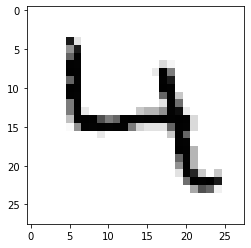

In [25]:
import matplotlib.pyplot as plt
plt.imshow(mnist_test.test_data[r:r+1].view(28,28),cmap='Greys',interpolation='nearest')
plt.show()